In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('Electricity+Consumption.csv')

In [97]:
df.dropna(inplace=True)
df1 = df.iloc[:,1:]

In [98]:
df

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


<Axes: >

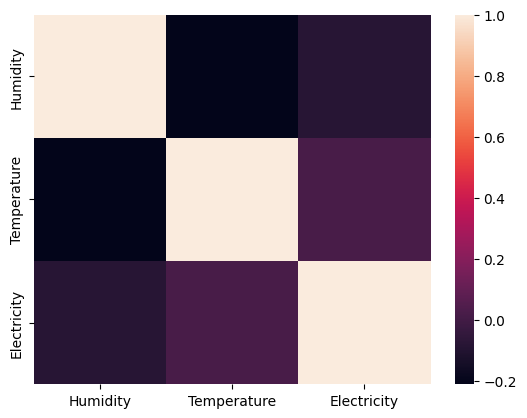

In [99]:
import seaborn as sn
sn.heatmap(df1.corr())

In [103]:
training_set = df.iloc[:8712,1:4].values
test_set = df.iloc[8712:,1:4].values
training_set.shape

(8712, 3)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler(feature_range=(0,1))

In [104]:
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)
test_set_scaled

array([[0.61702128, 0.375     , 0.08372093],
       [0.70212766, 0.30555556, 0.04186047],
       [0.68085106, 0.22222222, 0.01860465],
       [0.65957447, 0.1875    , 0.        ],
       [0.65957447, 0.15972222, 0.04186047],
       [0.68085106, 0.125     , 0.1372093 ],
       [0.63829787, 0.08333333, 0.30930233],
       [0.63829787, 0.02777778, 0.44418605],
       [0.63829787, 0.        , 0.47906977],
       [0.61702128, 0.04166667, 0.43953488],
       [0.53191489, 0.09722222, 0.33488372],
       [0.46808511, 0.15972222, 0.41162791],
       [0.31914894, 0.22222222, 0.4       ],
       [0.21276596, 0.28472222, 0.38372093],
       [0.14893617, 0.29861111, 0.41860465],
       [0.        , 0.34027778, 0.56511628],
       [0.04255319, 0.3125    , 0.78139535],
       [0.21276596, 0.21527778, 1.        ],
       [0.27659574, 0.21527778, 0.90930233],
       [0.44680851, 0.125     , 0.84651163],
       [0.44680851, 0.13194444, 0.76046512],
       [0.53191489, 0.20138889, 0.61860465],
       [0.

In [17]:
test_set_scaled = test_set_scaled[:,0:2]

In [18]:
X_train = []
y_train = []
ws = 24

for i in range(ws,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-ws:i,0:3])
    y_train.append(training_set_scaled[i,2]) 
X_train,y_train = np.array(X_train),np.array(y_train)

In [23]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],3))

In [24]:
X_train.shape

(8688, 24, 3)

In [25]:
# Devloping the LSTM MODEL

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [102]:
X_train.shape

(8688, 24, 3)

In [81]:
model_p = Sequential()
model_p.add(LSTM(units=60,return_sequences=True, input_shape=(X_train.shape[1],3)))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=100,return_sequences=True))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=100,return_sequences=True))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=100))
model_p.add(Dropout(0.2))

model_p.add(Dense(units=1))

model_p.compile(optimizer='adam',loss='mean_squared_error')
model_p.fit(X_train,y_train, epochs=80, batch_size=32)


Epoch 1/80
272/272 [==============================] - 8s 21ms/step - loss: 0.0160
Epoch 2/80
272/272 [==============================] - 6s 20ms/step - loss: 0.0059
Epoch 3/80
272/272 [==============================] - 5s 19ms/step - loss: 0.0050
Epoch 4/80
272/272 [==============================] - 5s 19ms/step - loss: 0.0045
Epoch 5/80
272/272 [==============================] - 5s 19ms/step - loss: 0.0039
Epoch 6/80
272/272 [==============================] - 5s 20ms/step - loss: 0.0031
Epoch 7/80
272/272 [==============================] - 6s 21ms/step - loss: 0.0026
Epoch 8/80
272/272 [==============================] - 6s 21ms/step - loss: 0.0020
Epoch 9/80
272/272 [==============================] - 5s 20ms/step - loss: 0.0015
Epoch 10/80
272/272 [==============================] - 6s 20ms/step - loss: 0.0012
Epoch 11/80
272/272 [==============================] - 5s 20ms/step - loss: 0.0011
Epoch 12/80
272/272 [==============================] - 5s 19ms/step - loss: 9.7738e-04
Epoch 13/

In [82]:
model_p.save('LSTM-multivarient')

INFO:tensorflow:Assets written to: LSTM-multivarient/assets


INFO:tensorflow:Assets written to: LSTM-multivarient/assets


In [83]:
from keras.models import load_model
model_loaded = load_model('LSTM-multivarient')

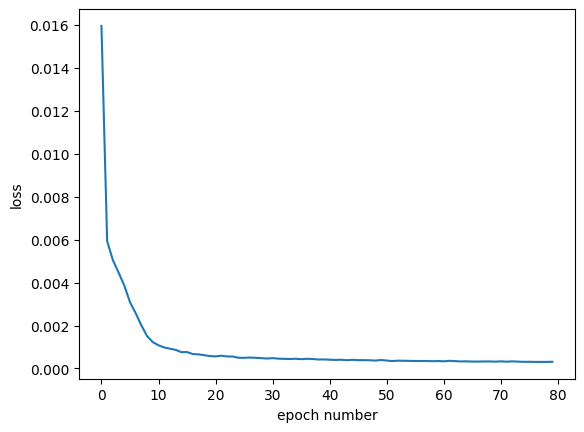

In [84]:
plt.plot(range(len(model_p.history.history['loss'])),model_p.history.history['loss'])
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.show()


In [85]:
### testing
prediction_test = []
batch_one = training_set_scaled[-ws:]
batch_new = batch_one.reshape((1,ws,3))

for i in range(48):
    first_prediction = model_loaded.predict(batch_new)[0]
    prediction_test.append(first_prediction)
    # batch_new = np.append(batch_new[:,1:,:],[[first_prediction]],axis=1)
    new_var = test_set_scaled[i,:]
    new_var = new_var.reshape(1,2)
    new_test = np.insert(new_var,2,[first_prediction], axis = 1)
    new_test = new_test.reshape(1,1,3)
    batch_new = np.append(batch_new[:,1:,:], new_test, axis=1)

prediction_test = np.array(prediction_test)

1/1 [==============================] - 0s 11ms/step


In [86]:
si = MinMaxScaler(feature_range=(0,1))
y_scaled = training_set[:,2:3]   ## Extract all the row but only last col
si.fit_transform(y_scaled)


array([[0.27878788],
       [0.25541126],
       [0.23636364],
       ...,
       [0.42770563],
       [0.38268398],
       [0.33506494]])

In [87]:
prediction = si.inverse_transform(prediction_test)

In [88]:
prediction

array([[ 909.14703],
       [ 862.9104 ],
       [ 839.06116],
       [ 833.4733 ],
       [ 844.6118 ],
       [ 886.0943 ],
       [ 970.7574 ],
       [1061.9731 ],
       [1095.2529 ],
       [1080.7894 ],
       [1053.4855 ],
       [1030.4462 ],
       [1013.34235],
       [ 996.20526],
       [ 976.4472 ],
       [ 958.5193 ],
       [ 958.1637 ],
       [1010.4502 ],
       [1135.576  ],
       [1191.9071 ],
       [1148.6664 ],
       [1128.9744 ],
       [1080.8912 ],
       [1008.00684],
       [ 926.6705 ],
       [ 863.4367 ],
       [ 830.5376 ],
       [ 820.7462 ],
       [ 825.2985 ],
       [ 841.042  ],
       [ 885.8808 ],
       [ 992.18427],
       [1100.1273 ],
       [1112.7953 ],
       [1075.8721 ],
       [1035.73   ],
       [1001.5305 ],
       [ 966.7984 ],
       [ 931.1889 ],
       [ 903.76904],
       [ 895.85175],
       [ 918.9555 ],
       [ 947.62726],
       [ 963.2529 ],
       [ 995.30054],
       [1008.1395 ],
       [ 994.1118 ],
       [ 966.

In [89]:
real_values = test_set[:,2]

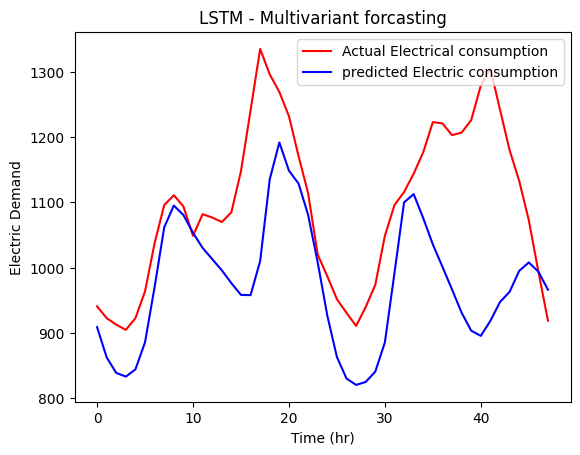

In [90]:
plt.plot(real_values,color='red',label='Actual Electrical consumption')
plt.plot(prediction,color='blue',label='predicted Electric consumption')
plt.title('LSTM - Multivariant forcasting')
plt.xlabel('Time (hr)')
plt.ylabel('Electric Demand')
plt.legend()
plt.show()

In [91]:
import math
from sklearn.metrics import mean_squared_error, r2_score
rmse = math.sqrt(mean_squared_error(real_values,prediction))

In [92]:
rmse

158.34784650754253

In [93]:
r2_score(real_values,prediction)

-0.6583052126313307